In [86]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

from matplotlib.patches import Rectangle
from PIL import Image
from torchvision.transforms import v2


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

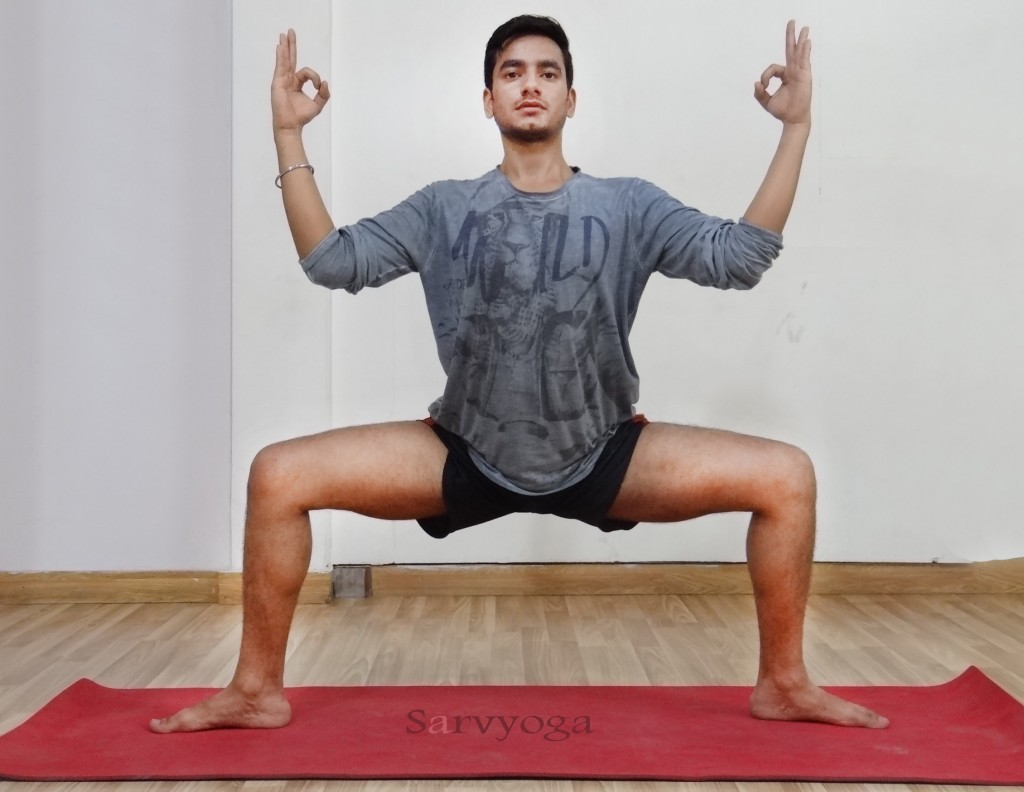

In [87]:
image = Image.open("./data/eksperimen-3/test/goddess/custom27.jpg")

image

In [88]:
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle


def visualize_svga_graph(image, patch_size, k, node_indices):
    # Convert image tensor to numpy array
    image_np = image.cpu().squeeze().permute(1, 2, 0).numpy()
    # Plot the image
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image_np)
    img_height, img_width, _ = image_np.shape
    num_patches_row = img_width // patch_size
    num_patches_col = img_height // patch_size

    # Create a custom colormap excluding red
    colors = [
        "green",
        "yellow",
        "orange",
        "cyan",
    ]
    n_bins = len(colors)
    cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)
    # Generate distinct colors for edges of each node
    edge_colors = [cmap(i) for i in np.linspace(0, 1, len(node_indices))]

    for idx, node_index in enumerate(node_indices):
        # Get the coordinates of the main node
        main_x, main_y = patch_index_to_coords(node_index, patch_size, img_width)
        edge_color = edge_colors[idx]

        # Draw connections to every kth pixel in the row and column
        for offset in range(k, max(num_patches_row, num_patches_col), k):
            # Right row connection
            if (node_index % num_patches_row) + offset < num_patches_row:
                connected_index = node_index + offset
                nx, ny = patch_index_to_coords(connected_index, patch_size, img_width)
                # Draw line
                connection = patches.FancyArrowPatch(
                    (main_y + patch_size / 2, main_x + patch_size / 2),
                    (ny + patch_size / 2, nx + patch_size / 2),
                    connectionstyle="arc3,rad=.5",
                    color=edge_color,
                    alpha=0.5,
                    arrowstyle="-",
                )
                ax.add_patch(connection)
                # Draw connected node in blue
                connected_rect = Rectangle(
                    (ny, nx),
                    patch_size,
                    patch_size,
                    linewidth=1,
                    edgecolor="blue",
                    facecolor="none",
                )
                ax.add_patch(connected_rect)

            # Down column connection
            if (node_index // num_patches_row) + offset < num_patches_col:
                connected_index = node_index + (offset * num_patches_row)
                nx, ny = patch_index_to_coords(connected_index, patch_size, img_width)
                # Draw line
                connection = patches.FancyArrowPatch(
                    (main_y + patch_size / 2, main_x + patch_size / 2),
                    (ny + patch_size / 2, nx + patch_size / 2),
                    connectionstyle="arc3,rad=.5",
                    color=edge_color,
                    alpha=0.5,
                    arrowstyle="-",
                )
                ax.add_patch(connection)
                # Draw connected node in blue
                connected_rect = Rectangle(
                    (ny, nx),
                    patch_size,
                    patch_size,
                    linewidth=1,
                    edgecolor="blue",
                    facecolor="none",
                )
                ax.add_patch(connected_rect)

        # Draw the main node in red
        main_rect = Rectangle(
            (main_y, main_x),
            patch_size,
            patch_size,
            linewidth=2,
            edgecolor="red",
            facecolor="none",
        )
        ax.add_patch(main_rect)

    plt.show()


# Helper function to convert patch index to coordinates
def patch_index_to_coords(index, patch_size, img_width):
    num_patches_per_row = img_width // patch_size
    row = index // num_patches_per_row
    col = index % num_patches_per_row
    return row * patch_size, col * patch_size


In [89]:
# Preprocess the image
preprocess = v2.Compose(
    [
        v2.ToImage(),
        v2.Resize((224, 224)),  # Resize to 224x224
        v2.ToDtype(torch.float32, scale=True),
    ]
)
image_tensor = preprocess(image).unsqueeze(dim=0).to(device)


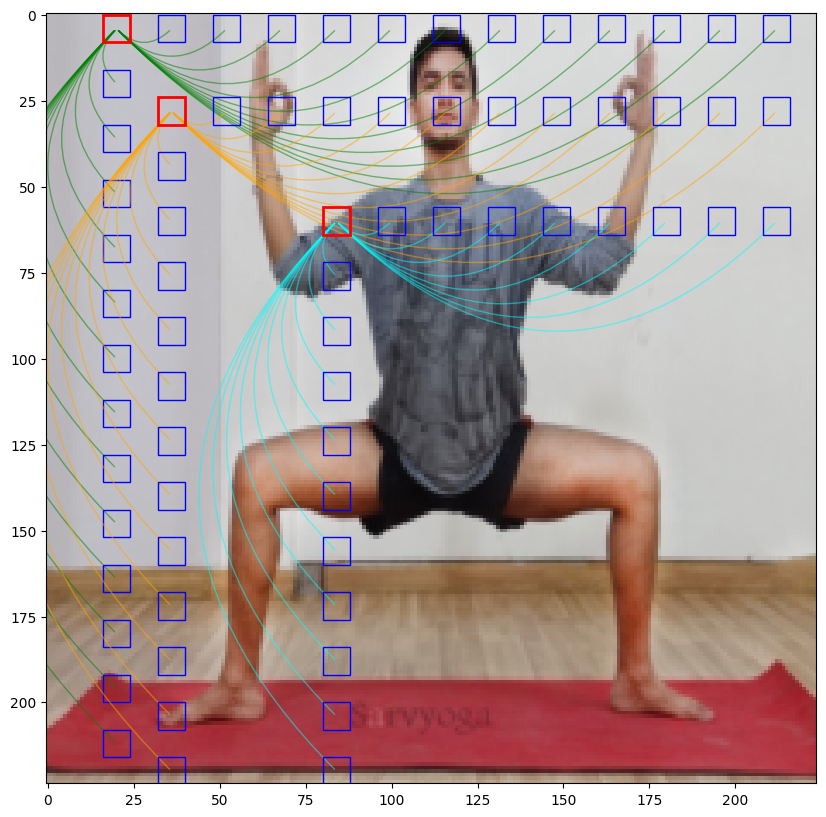

In [90]:
# Parameters
patch_size = 8  # Example patch size
k = 2  # Number of connections for SVGA graph
node_indices = [2, 88, 206]  # Example node indices to visualize

# Visualize the nodes with their SVGA connections
visualize_svga_graph(image_tensor, patch_size, k, node_indices)